In [34]:
import sys
import os
import pandas as pd
from data_loader import *
from data_processing import *
from tqdm import tqdm
from utils.helpers import *

# Ajoute le dossier "Clean/" à sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [35]:
cli_diff_bin_vintage = pd.read_csv('../Data/cli_diff_bin_vintage.csv', index_col=0)

In [39]:
cli_diff_bin_vintage.columns

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01'],
              dtype='datetime64[ns]', length=287, freq=None)

In [38]:
# Convertir les colonnes en datetime
cli_diff_bin_vintage.columns = pd.to_datetime(cli_diff_bin_vintage.columns)

In [40]:


cli_diff_bin_vintage.columns = cli_diff_bin_vintage.columns - pd.DateOffset(months=1)

cli_diff_bin_vintage.columns = cli_diff_bin_vintage.columns.map(lambda d: d.replace(day=15))

In [41]:
cli_diff_bin_vintage.columns 

DatetimeIndex(['2000-12-15', '2001-01-15', '2001-02-15', '2001-03-15',
               '2001-04-15', '2001-05-15', '2001-06-15', '2001-07-15',
               '2001-08-15', '2001-09-15',
               ...
               '2024-04-15', '2024-05-15', '2024-06-15', '2024-07-15',
               '2024-08-15', '2024-09-15', '2024-10-15', '2024-11-15',
               '2024-12-15', '2025-01-15'],
              dtype='datetime64[ns]', length=287, freq=None)

In [42]:
cli_diff_bin_vintage.to_csv('cli_diff_bin_vintage.csv', index=True)

In [33]:
cli_diff_bin_vintage['2016-09-01'].last_valid_index()

'2016-08-01'

In [15]:
# Création de la série avec la dernière valeur non-NaN de chaque colonne
target_cli_diff = cli_diff_bin_vintage.apply(
    lambda col: col.dropna().iloc[-1] if not col.dropna().empty else None
)

# Conversion de l'index en datetime
target_cli_diff.index = pd.to_datetime(target_cli_diff.index)

target_cli_diff.index = target_cli_diff.index - pd.DateOffset(months=1)

target_cli_diff.index = target_cli_diff.index.map(lambda d: d.replace(day=15))

target_cli_diff


2000-12-15    0.0
2001-01-15    0.0
2001-02-15    0.0
2001-03-15    0.0
2001-04-15    0.0
             ... 
2024-09-15    1.0
2024-10-15    1.0
2024-11-15    1.0
2024-12-15    1.0
2025-01-15    1.0
Length: 287, dtype: float64

In [17]:
full_month_index = pd.date_range(
    start=target_cli_diff.index.min(),
    end=target_cli_diff.index.max(),
    freq='MS'  # début de chaque mois
).map(lambda d: d.replace(day=15))  # met tout au 15

# Trouve les mois manquants
missing_months = full_month_index.difference(target_cli_diff.index)

print("📅 Mois manquants :", missing_months.strftime('%Y-%m-%d').tolist())

📅 Mois manquants : ['2016-06-15', '2016-07-15', '2020-02-15']


In [16]:
# Sauvegarde dans un fichier CSV
target_cli_diff.to_csv('target_cli_diff.csv')

In [5]:
cli_diff_bin_vintage.columns

Index(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01',
       '2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
       ...
       '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
       '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01'],
      dtype='object', length=287)

In [8]:
cli_diff_3 = pd.read_csv('target_diff_roll3.csv', index_col=0)
cli_diff_3.index

Index(['2012-01-15', '2012-02-15', '2012-03-15', '2012-04-15', '2012-05-15',
       '2012-06-15', '2012-07-15', '2012-08-15', '2012-09-15', '2012-10-15',
       ...
       '2023-03-15', '2023-04-15', '2023-05-15', '2023-06-15', '2023-07-15',
       '2023-08-15', '2023-09-15', '2023-10-15', '2023-11-15', '2023-12-15'],
      dtype='object', length=141)

In [39]:
perfect_target = pd.read_csv('perfect_target.csv', index_col=0, parse_dates=True)
perfect_target.index

DatetimeIndex(['2013-10-15', '2013-11-15', '2013-12-15', '2014-01-15',
               '2014-02-15', '2014-03-15', '2014-04-15', '2014-05-15',
               '2014-06-15', '2014-07-15',
               ...
               '2022-02-15', '2022-03-15', '2022-04-15', '2022-05-15',
               '2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', name='formatted_date', length=110, freq=None)

In [34]:
cli = pd.read_csv('pivot_cli_filtered.csv', index_col=0, sep=';', header = 1)

cli.index = pd.to_datetime(cli.index)
cli.columns = pd.to_datetime(cli.columns)

DatetimeIndex(['2013-10-15', '2013-11-15', '2013-12-15', '2014-01-15',
               '2014-02-15', '2014-03-15', '2014-04-15', '2014-05-15',
               '2014-06-15', '2014-07-15',
               ...
               '2022-02-15', '2022-03-15', '2022-04-15', '2022-05-15',
               '2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', length=107, freq=None)


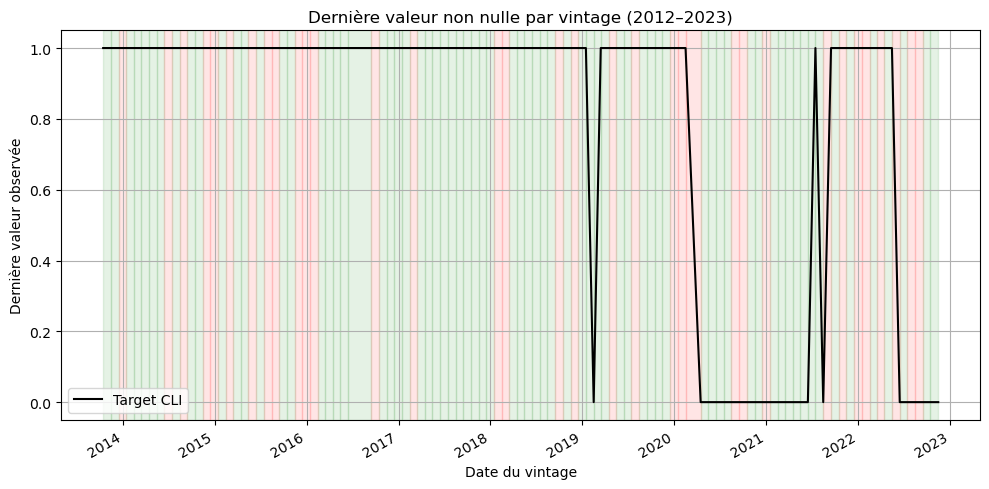

In [ ]:
"""
Extrait la dernière valeur non nulle de chaque colonne d'un DataFrame CLI vintage
(index et colonnes en datetime), sur la période 2012-2023, et retourne une Series
avec ces valeurs indexées dans le temps.

Args:
    cli (pd.DataFrame): DataFrame carré (index = dates, colonnes = dates)
Returns:
    pd.Series: Série temporelle des dernières valeurs non nulles par colonne
"""

# Assure que l'index et les colonnes sont des datetime
cli.index = pd.to_datetime(cli.index)
cli.columns = pd.to_datetime(cli.columns)

# Filtre les colonnes entre 2012 et 2023 inclus
cli_filtered = cli.loc[:, (cli.columns >= "2012-01-01") & (cli.columns <= "2023-12-31")]

# Initialisation de la target
target = pd.Series(index=cli_filtered.columns, dtype=float)

# Remplissage
for col in cli_filtered.columns:
    col_data = cli_filtered[col].dropna()
    if not col_data.empty:
            target[col] = col_data.iloc[-1]

target.index = target.index + pd.DateOffset(days=14)
target = target[target.index.isin(perfect_target.index)]
target_cli = (target > 99).astype(int)



# Sauvegarde de la target_diff_roll10 dans un fichier CSV
#target_cli.to_csv('cli.csv', header=True, index=True)

# Plot
import matplotlib.pyplot as plt

# --- Plot avec fond coloré selon perfect_target ---
fig, ax = plt.subplots(figsize=(10, 5))

# Courbe de target_cli
target_cli.plot(ax=ax, label='Target CLI', color='black')

# Ajout du fond vert/rouge selon perfect_target (on suppose que c'est une Series)
perfect_target_series = perfect_target.iloc[:, 0] if isinstance(perfect_target, pd.DataFrame) else perfect_target

# Fond coloré (vert si 1, rouge si 0)
for date_start, date_end in zip(target_cli.index[:-1], target_cli.index[1:]):
    val = perfect_target_series.loc[date_start]
    color = 'green' if val == 1 else 'red'
    ax.axvspan(date_start, date_end, color=color, alpha=0.1)

# Mise en forme
ax.set_title("Dernière valeur non nulle par vintage (2012–2023)")
ax.set_xlabel("Date du vintage")
ax.set_ylabel("Dernière valeur observée")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()




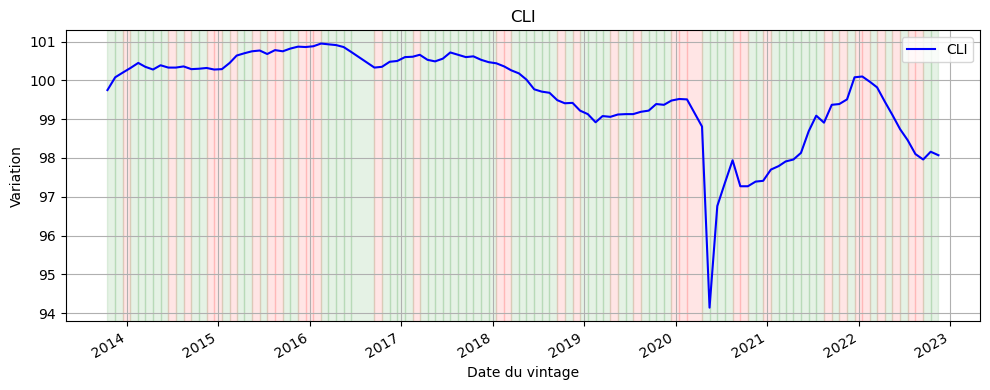

In [58]:
import matplotlib.pyplot as plt

# --- Plot avec fond coloré selon perfect_target ---
fig, ax = plt.subplots(figsize=(10, 4))

# Courbe de target
target.plot(ax=ax, label='CLI', color='blue')

# Extraction de perfect_target en Series si besoin
perfect_target_series = perfect_target.iloc[:, 0] if isinstance(perfect_target, pd.DataFrame) else perfect_target

# Ajout du fond vert/rouge
for date_start, date_end in zip(target.index[:-1], target.index[1:]):
    val = perfect_target_series.loc[date_start]
    color = 'green' if val == 1 else 'red'
    ax.axvspan(date_start, date_end, color=color, alpha=0.1)

# Mise en forme
ax.set_title("CLI")
ax.set_xlabel("Date du vintage")
ax.set_ylabel("Variation")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


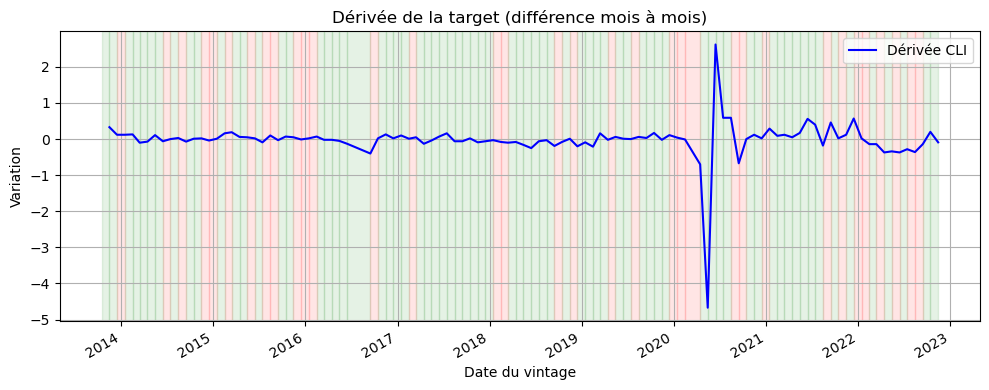

In [60]:
import matplotlib.pyplot as plt

# --- Calcul de la dérivée ---
target_diff = target.diff()

# --- Plot avec fond rouge/vert selon perfect_target ---
fig, ax = plt.subplots(figsize=(10, 4))

# Courbe de la dérivée
target_diff.plot(ax=ax, label='Dérivée CLI', color='blue')

# Extraction de perfect_target en Series si besoin
perfect_target_series = perfect_target.iloc[:, 0] if isinstance(perfect_target, pd.DataFrame) else perfect_target

# Fond rouge/vert
for date_start, date_end in zip(target_diff.index[:-1], target_diff.index[1:]):
    val = perfect_target_series.loc[date_start]
    color = 'green' if val == 1 else 'red'
    ax.axvspan(date_start, date_end, color=color, alpha=0.1)

# Mise en forme
ax.set_title("Dérivée de la target (différence mois à mois)")
ax.set_xlabel("Date du vintage")
ax.set_ylabel("Variation")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


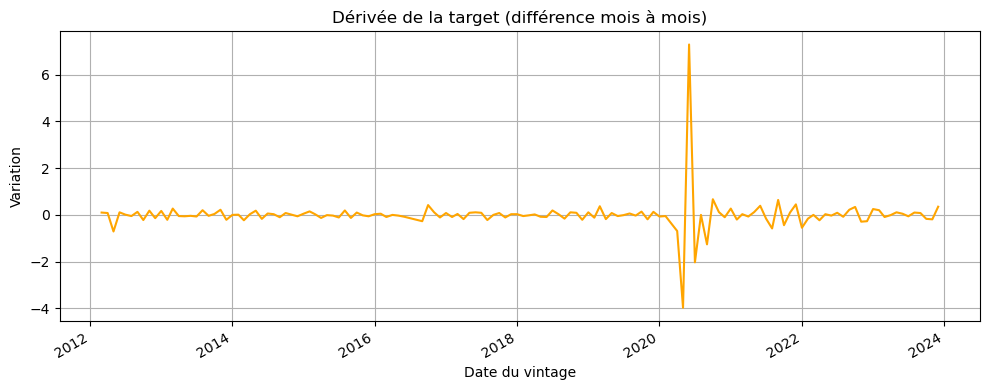

In [14]:
# Dérivée (différence première)
target_diff2 = target.diff().diff()

# Plot de la dérivée
target_diff2.plot(title="Dérivée de la target (différence mois à mois)", figsize=(10, 4), color="orange")
plt.xlabel("Date du vintage")
plt.ylabel("Variation")
plt.grid(True)
plt.tight_layout()
plt.show()

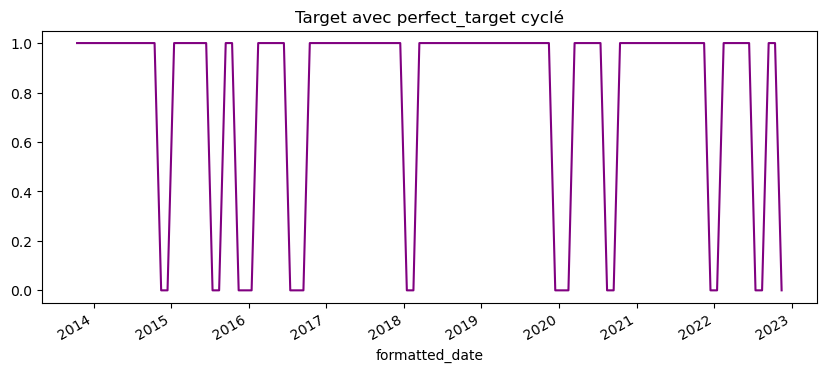

In [63]:
# S'assurer que c’est une Series
perfect_series = perfect_target.iloc[:, 0] if isinstance(perfect_target, pd.DataFrame) else perfect_target
cycling_perfect_target = perfect_series.copy()

# Parcourt tous les indices sauf les premiers et derniers
for i in range(1, len(perfect_series) - 1):
    if perfect_series.iloc[i] == 0 and perfect_series.iloc[i - 1] == 1 and perfect_series.iloc[i + 1] == 1:
        cycling_perfect_target.iloc[i] = 1

# Plot de la target avec le perfect_target cyclé
cycling_perfect_target.plot(title="Target avec perfect_target cyclé", figsize=(10, 4), color="purple")
cycling_perfect_target.to_csv('cycling_perfect_target.csv', header=True, index=True)

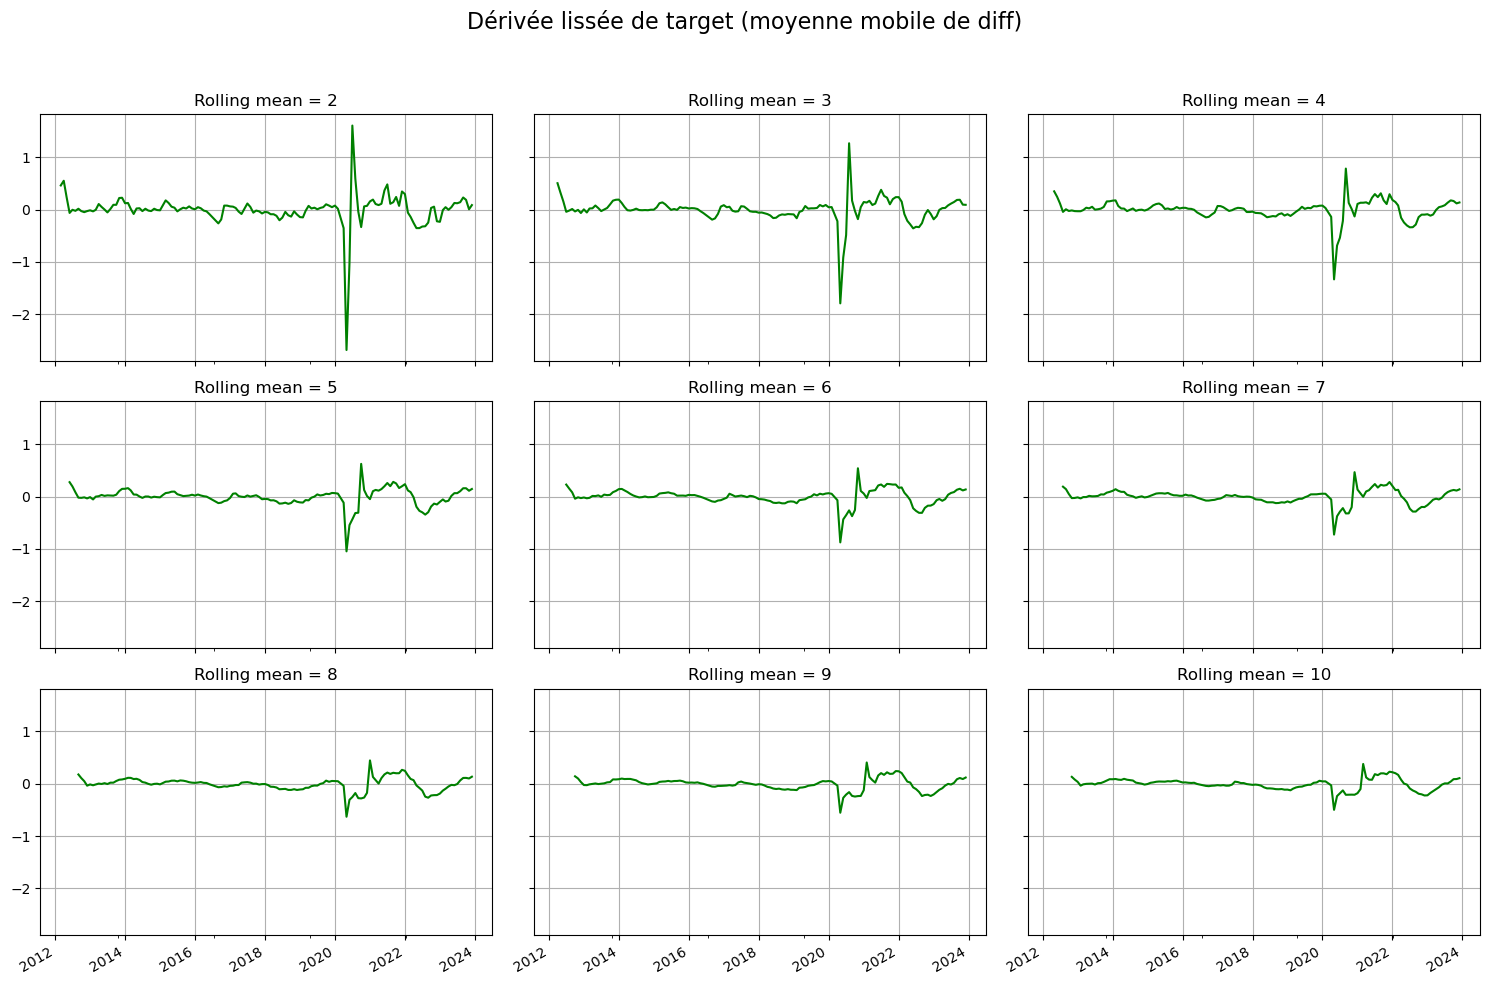

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Dérivée lissée de target (moyenne mobile de diff)", fontsize=16)

windows = range(2, 11)  # Rolling windows de 2 à 10

for i, win in enumerate(windows):
    ax = axs[i // 3, i % 3]
    smoothed_diff = target.diff().rolling(win).mean()
    smoothed_diff.plot(ax=ax, color='green')
    ax.set_title(f"Rolling mean = {win}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


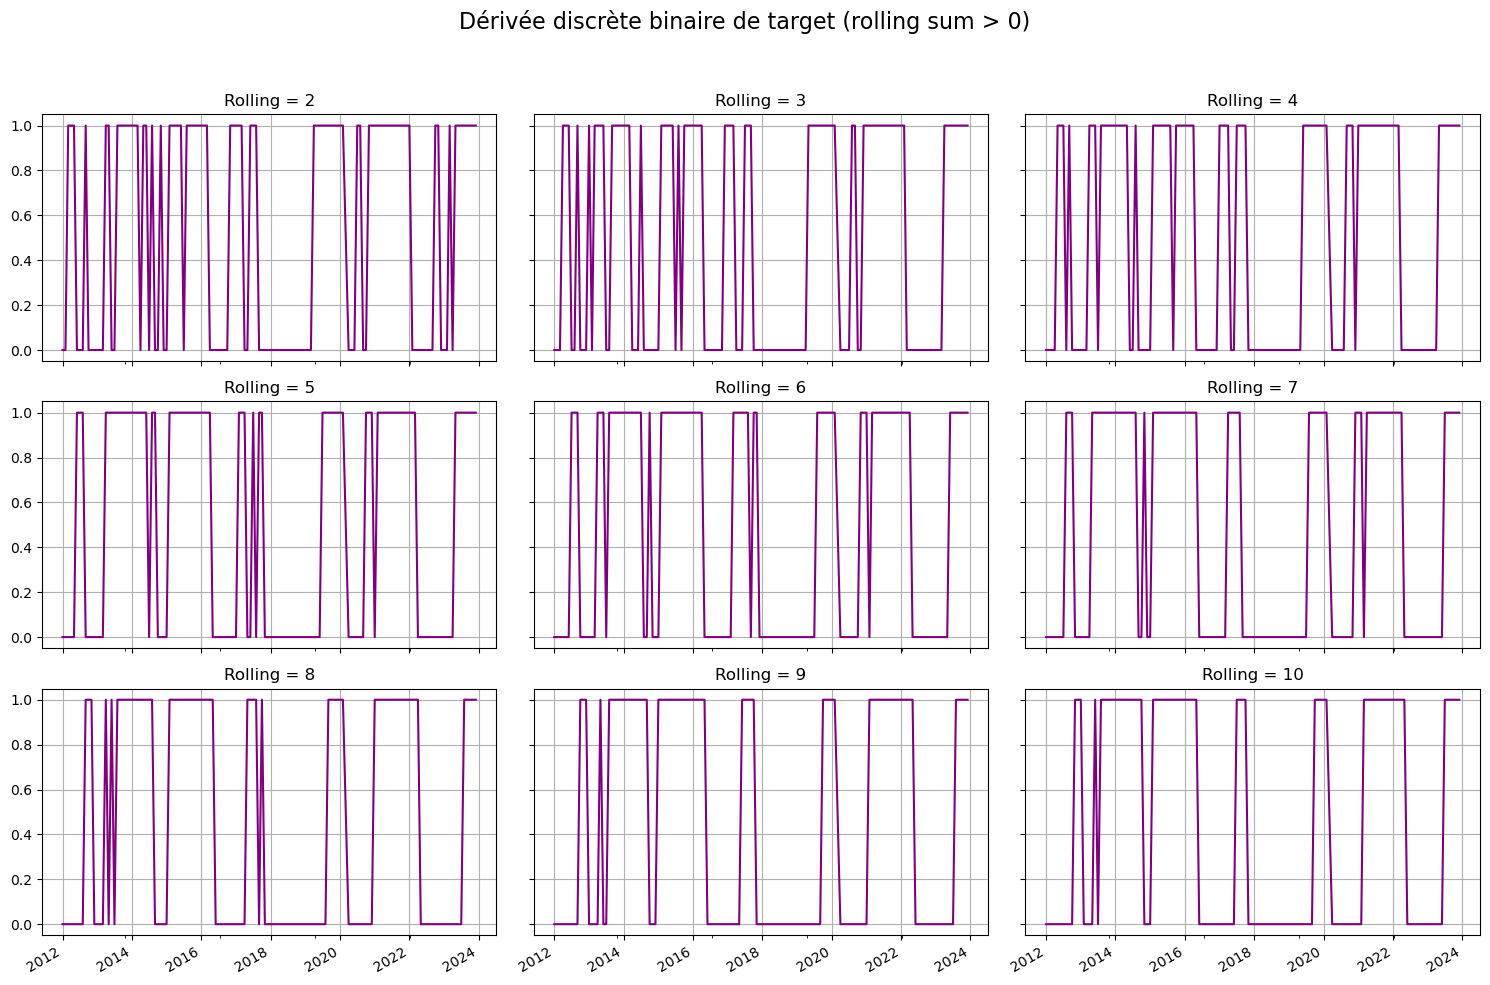

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Dérivée discrète binaire de target (rolling sum > 0)", fontsize=16)

# Fenêtres de lissage de 2 à 10
windows = range(2, 11)

for i, win in enumerate(windows):
    ax = axs[i // 3, i % 3]
    target_diff_discrete = (target.diff().rolling(win).sum() > 0).astype(int)
    target_diff_discrete.plot(ax=ax, color='purple')
    ax.set_title(f"Rolling = {win}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # pour ne pas couper le titre
plt.show()


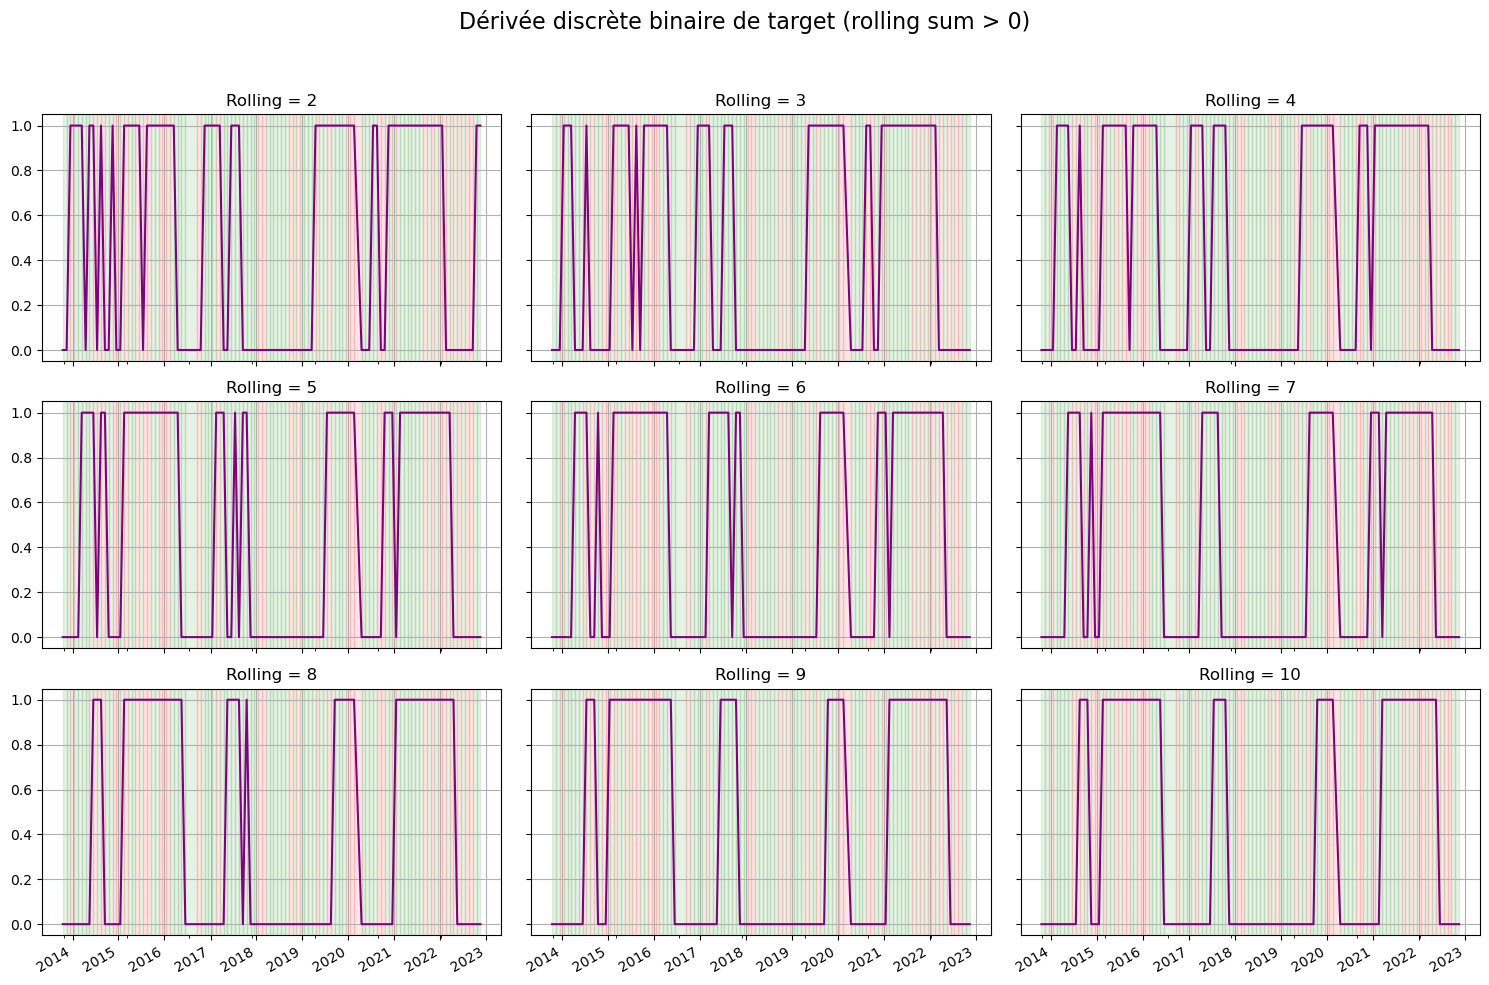

In [61]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Dérivée discrète binaire de target (rolling sum > 0)", fontsize=16)

# Extraction de perfect_target en Series si besoin
perfect_target_series = perfect_target.iloc[:, 0] if isinstance(perfect_target, pd.DataFrame) else perfect_target

# Fenêtres de lissage de 2 à 10
windows = range(2, 11)

for i, win in enumerate(windows):
    ax = axs[i // 3, i % 3]
    
    # Calcul de la dérivée discrète binaire
    target_diff_discrete = (target.diff().rolling(win).sum() > 0).astype(int)
    
    # Plot de la série
    target_diff_discrete.plot(ax=ax, color='purple')
    ax.set_title(f"Rolling = {win}")
    ax.grid(True)
    
    # Ajout du fond rouge/vert
    for date_start, date_end in zip(target_diff_discrete.index[:-1], target_diff_discrete.index[1:]):
        val = perfect_target_series.get(date_start, 0)
        color = 'green' if val == 1 else 'red'
        ax.axvspan(date_start, date_end, color=color, alpha=0.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # pour ne pas couper le titre
plt.show()


In [9]:
target_diff_roll2 = (target.diff().rolling(2).sum() > 0).astype(int)
# Sauvegarde de la target_diff_roll10 dans un fichier CSV
target_diff_roll2.to_csv('target_diff_roll2.csv', header=True, index=True)